In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

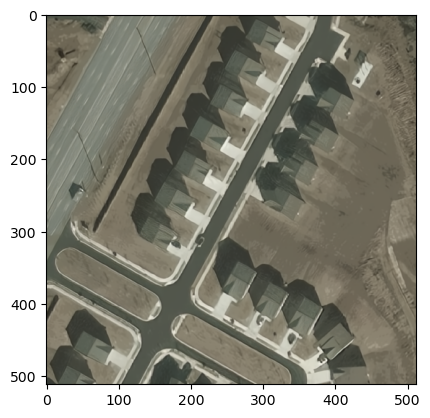

In [2]:
# Read the image
image = cv.imread("road_elements.tiff")

# Change the color tp RGB from BGR
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(image)

In [3]:
print(image.shape)

(512, 512, 3)


In [4]:
#The image is a 3 dimensional array, in order to apply
# K means clustering on it, we need to reshape it to a 2-dimensional array.

In [5]:
# reshaping the image into a 2D aaray of pixels 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

# convert to float type
pixel_vals = np.float32(pixel_vals)

In [6]:
print(pixel_vals.shape)

(262144, 3)


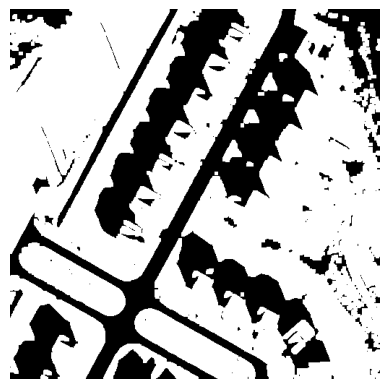

In [21]:
#the below line of code defines the criteria for the algorithm to stop running, 
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy) 
#becomes 85%
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 3
retval, labels, centers = cv.kmeans(pixel_vals, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# convert data into 8 bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

#apply morphological operations
segmented_image_gray = cv.cvtColor(segmented_image, cv.COLOR_RGB2GRAY)
_, segmented_image_thresh = cv.threshold(segmented_image_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
segmented_image_opening = cv.morphologyEx(segmented_image_thresh, cv.MORPH_OPEN, np.ones((3,3), np.uint8), iterations=2)

plt.imshow(segmented_image_opening, cmap='gray')
plt.axis('off')
plt.show()